# Water Potability

## Data Description
1. **pH value:**<br>
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. **Hardness:**<br>
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. **Solids (Total dissolved solids - TDS):**<br>
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines:**<br>
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate:**<br>
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. **Conductivity:**<br>
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon:**<br>
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. **Trihalomethanes:**<br>
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity:**<br>
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

### Target Variable:
**Potability** (ความสามารถในการดื่ม)
- 0 ดื่มไม่ได้
- 1 ดื่มได้

## Objective:
สร้าง classification model เพื่อทำนายว่าน้ำมีคุณภาพที่สามารถดื่มได้หรือไม่


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import plot_roc_curve

In [ ]:
df = pd.read_csv('water_potability.csv')

In [ ]:
df.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2305,5.280292,164.057389,13679.056905,5.971385,NaN,635.888484,11.805625,35.433864,3.835306,1
1591,7.918087,175.337240,29565.711108,7.432180,NaN,322.533423,11.309245,70.116746,4.640043,1
826,6.901863,164.723486,20442.615014,5.163931,341.537089,468.416350,10.362623,65.694878,4.047907,0
1612,6.707108,211.086503,10794.783898,7.967188,373.571878,406.198555,18.781679,NaN,2.640246,1
2281,9.228484,200.710330,26744.231526,6.833360,339.820719,363.950991,14.144772,86.950200,4.829754,0
1484,6.044672,150.671021,13593.600018,6.456238,401.737392,392.206741,19.827392,43.564293,4.914884,1
2753,6.163519,185.790317,37282.522490,8.240832,NaN,411.183589,16.162059,84.931402,3.477245,1
616,NaN,190.929256,20661.411063,10.175484,299.345576,471.062640,9.225985,60.023523,4.969150,0
2863,5.547576,182.644736,27417.998043,9.586090,378.526141,596.650495,11.565242,78.878604,4.448671,1
2480,9.012100,268.679299,13064.450591,7.625641,358.336760,549.827142,12.015868,63.698404,4.962329,0


In [ ]:
df.shape

(3276, 10)

## Data Cleaning

###เช็คว่ามีข้อมูลว่างหรือไม่

In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

กำจัดข้อมูลว่างออก

In [ ]:
df_clean = df.dropna()
df_clean.shape

(2011, 10)

In [ ]:
df_clean.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
165,7.308049,274.704950,14600.539522,8.105803,384.564852,415.607278,16.761625,68.937227,3.696120,0
1230,7.943882,211.816551,32071.179369,7.769215,290.337398,353.336484,17.871950,78.492783,4.111691,0
1500,6.897923,173.390928,16616.516617,6.352934,329.339768,337.436088,12.446976,60.159413,4.490105,1
1394,7.371290,180.736526,25672.311996,7.377422,310.567467,298.053057,12.671607,27.559355,4.084697,0
2351,6.252810,187.569479,27690.474784,6.489931,330.949210,303.496373,14.261369,57.952826,2.921797,1
184,5.877974,141.615287,13652.293199,5.701659,279.782400,538.495404,12.034042,67.907258,4.032260,0
2401,4.083595,201.938643,20555.965489,1.920271,341.597153,435.511529,12.226676,69.289779,2.974871,1
655,6.604008,212.978467,23564.579663,6.608205,325.353860,430.332754,14.352905,33.403048,4.458967,0
1073,7.203439,168.445358,22826.484697,6.283250,271.892045,437.370863,16.410654,64.505923,6.389161,1
2632,10.188433,286.567991,7105.800709,9.840540,321.686059,437.879508,12.871599,78.732055,4.635243,0


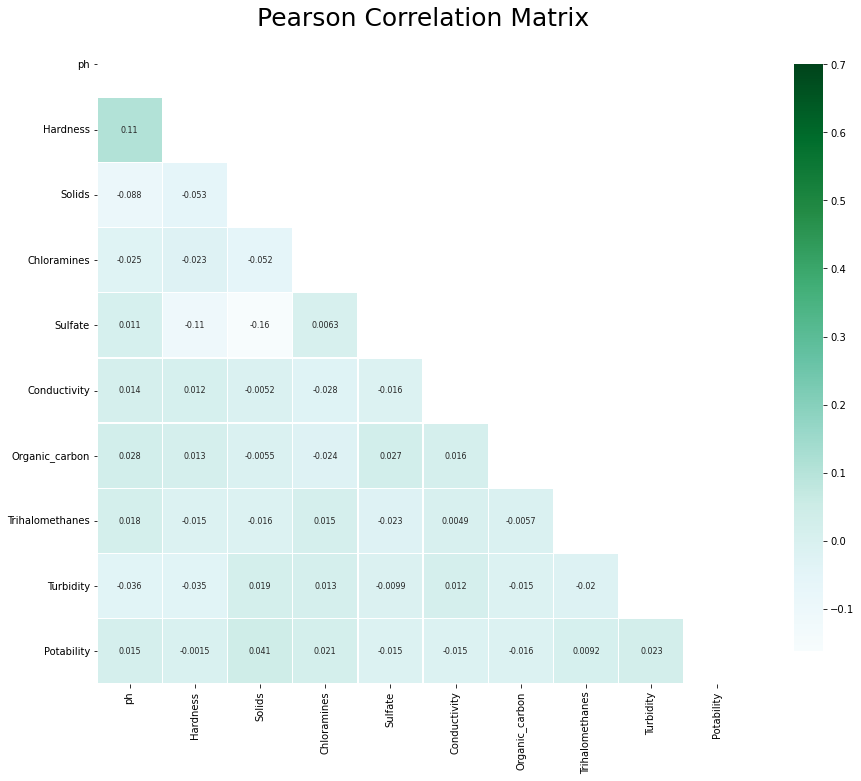

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

mask = np.zeros_like(df_clean.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix', fontsize=25)

sns.heatmap(df_clean.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

พบว่าข้อมูลไม่เกิด Multicollinearity จึงไม่ต้องทำอะไรกับข้อมูล

### กำจัดข้อมูลที่เป็น outlier ออก

ph

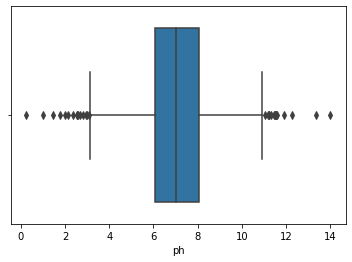

In [ ]:
sns.boxplot(x=df_clean['ph'])

In [ ]:
Q1_ph = df_clean['ph'].quantile(0.25)
Q3_ph = df_clean['ph'].quantile(0.75)
IQR_ph = Q3_ph - Q1_ph
lower_limit_ph = Q1_ph - 1.5*IQR_ph
upper_limit_ph = Q3_ph + 1.5*IQR_ph

df_clean = df_clean[(df_clean['ph'] > lower_limit_ph) & (df_clean['ph'] < upper_limit_ph)]

In [ ]:
df_clean.shape

(1980, 10)

Hardness

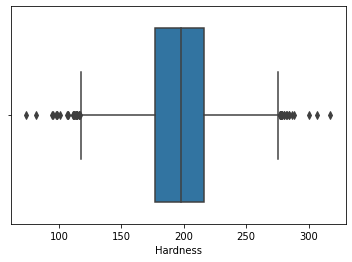

In [ ]:
sns.boxplot(x=df_clean['Hardness'])

In [ ]:
Q1_Hardness = df_clean['Hardness'].quantile(0.25)
Q3_Hardness = df_clean['Hardness'].quantile(0.75)
IQR_Hardness = Q3_Hardness - Q1_Hardness
lower_limit_Hardness = Q1_Hardness - 1.5*IQR_Hardness
upper_limit_Hardness = Q3_Hardness + 1.5*IQR_Hardness

df_clean = df_clean[(df_clean['Hardness'] > lower_limit_Hardness) & (df_clean['Hardness'] < upper_limit_Hardness)]

In [ ]:
df_clean.shape

(1934, 10)

Solids

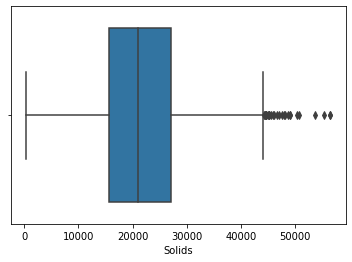

In [ ]:
sns.boxplot(x=df_clean['Solids'])

In [ ]:
Q1_Solids = df_clean['Solids'].quantile(0.25)
Q3_Solids = df_clean['Solids'].quantile(0.75)
IQR_Solids = Q3_Solids - Q1_Solids
lower_limit_Solids = Q1_Solids - 1.5*IQR_Solids
upper_limit_Solids = Q3_Solids + 1.5*IQR_Solids

df_clean = df_clean[(df_clean['Solids'] > lower_limit_Solids) & (df_clean['Solids'] < upper_limit_Solids)]

In [ ]:
df_clean.shape

(1906, 10)

Chloramines

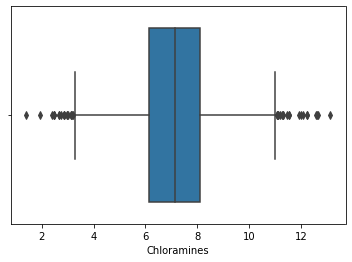

In [ ]:
sns.boxplot(x=df_clean['Chloramines'])

In [ ]:
Q1_Chloramines = df_clean['Chloramines'].quantile(0.25)
Q3_Chloramines = df_clean['Chloramines'].quantile(0.75)
IQR_Chloramines = Q3_Chloramines - Q1_Chloramines
lower_limit_Chloramines = Q1_Chloramines - 1.5*IQR_Chloramines
upper_limit_Chloramines = Q3_Chloramines + 1.5*IQR_Chloramines

df_clean = df_clean[(df_clean['Chloramines'] > lower_limit_Chloramines) & (df_clean['Chloramines'] < upper_limit_Chloramines)]

In [ ]:
df_clean.shape

(1867, 10)

Sulfate

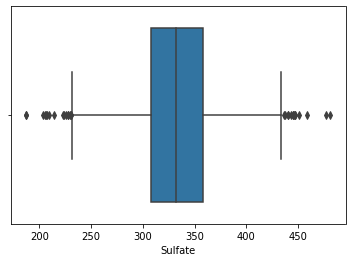

In [ ]:
sns.boxplot(x=df_clean['Sulfate'])

In [ ]:
Q1_Sulfate = df_clean['Sulfate'].quantile(0.25)
Q3_Sulfate = df_clean['Sulfate'].quantile(0.75)
IQR_Sulfate = Q3_Sulfate - Q1_Sulfate
lower_limit_Sulfate = Q1_Sulfate - 1.5*IQR_Sulfate
upper_limit_Sulfate = Q3_Sulfate + 1.5*IQR_Sulfate

df_clean = df_clean[(df_clean['Sulfate'] > lower_limit_Sulfate) & (df_clean['Sulfate'] < upper_limit_Sulfate)]

In [ ]:
df_clean.shape

(1837, 10)

Conductivity

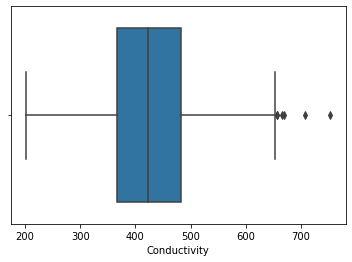

In [ ]:
sns.boxplot(x=df_clean['Conductivity'])

In [ ]:
Q1_Conductivity = df_clean['Conductivity'].quantile(0.25)
Q3_Conductivity = df_clean['Conductivity'].quantile(0.75)
IQR_Conductivity = Q3_Conductivity - Q1_Conductivity
lower_limit_Conductivity = Q1_Conductivity - 1.5*IQR_Conductivity
upper_limit_Conductivity = Q3_Conductivity + 1.5*IQR_Conductivity

df_clean = df_clean[(df_clean['Conductivity'] > lower_limit_Conductivity) & (df_clean['Conductivity'] < upper_limit_Conductivity)]

In [ ]:
df_clean.shape

(1831, 10)

Organic_carbon

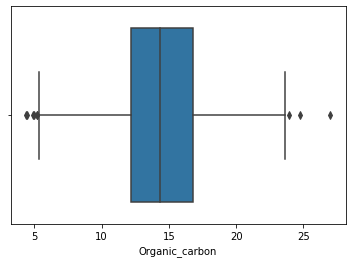

In [ ]:
sns.boxplot(x=df_clean['Organic_carbon'])

In [ ]:
Q1_Organic_carbon = df_clean['Organic_carbon'].quantile(0.25)
Q3_Organic_carbon = df_clean['Organic_carbon'].quantile(0.75)
IQR_Organic_carbon = Q3_Organic_carbon - Q1_Organic_carbon
lower_limit_Organic_carbon = Q1_Organic_carbon - 1.5*IQR_Organic_carbon
upper_limit_Organic_carbon = Q3_Organic_carbon + 1.5*IQR_Organic_carbon

df_clean = df_clean[(df_clean['Organic_carbon'] > lower_limit_Organic_carbon) & (df_clean['Organic_carbon'] < upper_limit_Organic_carbon)]

In [ ]:
df_clean.shape

(1822, 10)

Trihalomethanes

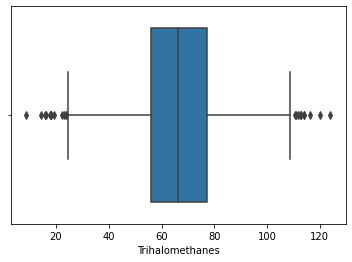

In [ ]:
sns.boxplot(x=df_clean['Trihalomethanes'])

In [ ]:
Q1_Trihalomethanes = df_clean['Trihalomethanes'].quantile(0.25)
Q3_Trihalomethanes = df_clean['Trihalomethanes'].quantile(0.75)
IQR_Trihalomethanes = Q3_Trihalomethanes - Q1_Trihalomethanes
lower_limit_Trihalomethanes = Q1_Trihalomethanes - 1.5*IQR_Trihalomethanes
upper_limit_Trihalomethanes = Q3_Trihalomethanes + 1.5*IQR_Trihalomethanes

df_clean = df_clean[(df_clean['Trihalomethanes'] > lower_limit_Trihalomethanes) & (df_clean['Trihalomethanes'] < upper_limit_Trihalomethanes)]

In [ ]:
df_clean.shape

(1800, 10)

###การทำ standardize และ normalize ข้อมูล

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

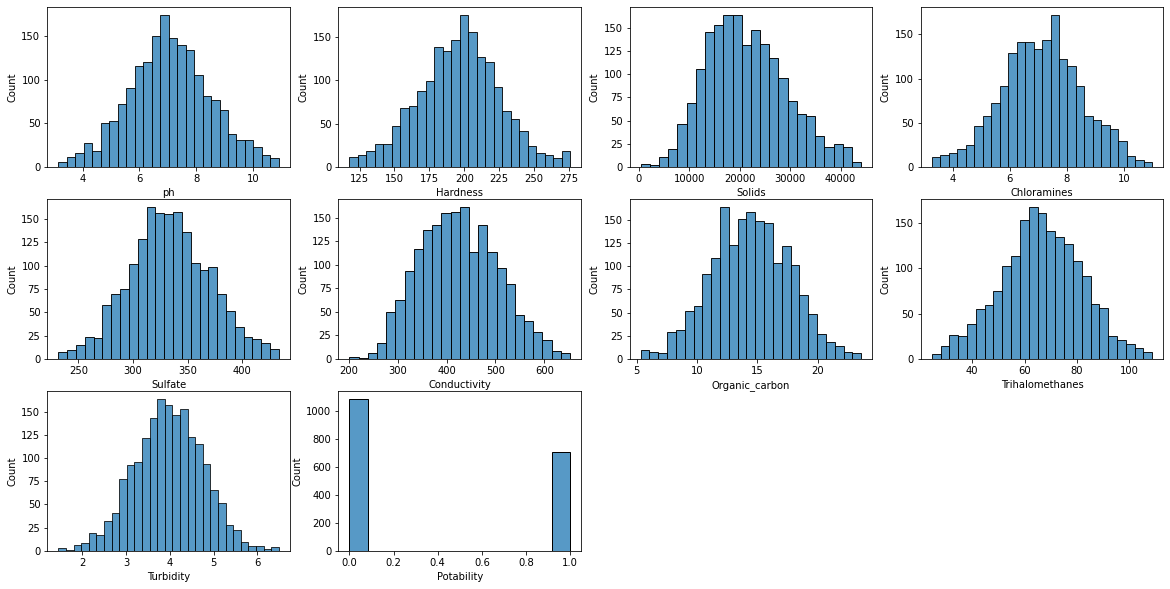

In [ ]:
plt.figure(figsize=(20,10))
for i, column in enumerate(df_clean.columns, 1):
    plt.subplot(3,4,i)
    sns.histplot(df_clean[column])

พบว่า feature ของ dataset นี้มีการกระจายตัวแบบ gaussian เราจึงใช้วิธีการ standardize

In [ ]:
norm = StandardScaler()
x = df_clean.drop('Potability', axis=1)
y = df_clean['Potability']
x = norm.fit(x).transform(x)

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=110)

In [ ]:
x_train

array([[-0.97532146,  0.11732167, -1.4970449 , ...,  2.26940461,
         0.90856132, -2.64559811],
       [ 0.56300099,  1.02424229, -1.09894218, ..., -2.57998804,
        -0.21190603,  0.34143606],
       [ 0.09559334, -2.58533625,  0.39990663, ..., -0.24130526,
        -0.17281358, -0.33658581],
       ...,
       [ 2.12216192,  1.50619018, -0.76929892, ...,  0.52635056,
        -0.34208103, -0.70128137],
       [-1.54143562,  0.89190125, -0.72691893, ...,  0.34104979,
         1.14998138, -0.00751722],
       [-0.06261452, -0.44204305,  0.20956742, ...,  0.51145494,
        -0.02682014,  1.0192244 ]])

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver='liblinear', class_weight= 'balanced')
clf_lr.fit(x_train, y_train)
y_pred_lr = clf_lr.predict(x_test)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, roc_auc_score

In [ ]:
lr_accuracy = round(accuracy_score(y_test, y_pred_lr)*100,2)
print(f'Accuracy : {lr_accuracy}%')

Accuracy : 48.61%


In [ ]:
print(f'Cross val score: {np.mean(cross_val_score(clf_lr, x, y, cv=10, n_jobs=-1)).round(2)*100}%')

Cross val score: 50.0%


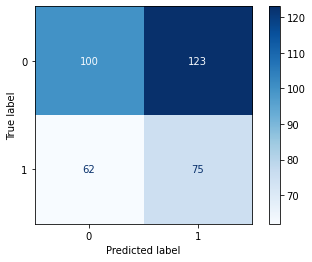

In [ ]:
plot_confusion_matrix(clf_lr, x_test, y_test, cmap='Blues', values_format='d')

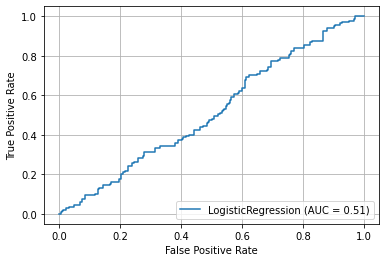

In [ ]:
plot_roc_curve(clf_lr, x_test, y_test)
plt.grid()

In [ ]:
lr_roc = round(roc_auc_score(y_test, y_pred_lr)*100,2)
print(f'Roc auc score : {lr_roc}%')

Roc auc score : 49.79%


### find optimal parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gs_lr = GridSearchCV(clf_lr,
                  param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
                  scoring='roc_auc', return_train_score=True, n_jobs=-1)
gs_lr.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [ ]:
gs_lr.best_params_

{'solver': 'newton-cg'}

### optimal parameter

In [ ]:
clf_lr_op = LogisticRegression(solver='newton-cg', class_weight= 'balanced')
clf_lr_op.fit(x_train, y_train)
y_pred_lr_op = clf_lr_op.predict(x_test)

In [ ]:
lr_accuracy = round(accuracy_score(y_test, y_pred_lr_op)*100,2)
print(f'Accuracy : {lr_accuracy}%')

Accuracy : 48.61%


In [ ]:
print(f'Cross val score: {np.mean(cross_val_score(clf_lr_op, x, y, cv=9, n_jobs=-1)).round(2)*100}%')

Cross val score: 50.0%


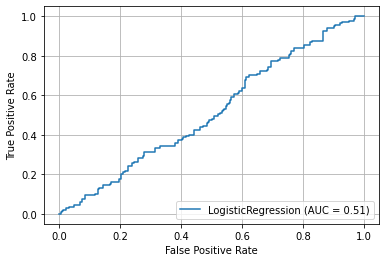

In [ ]:
plot_roc_curve(clf_lr_op, x_test, y_test)
plt.grid()

In [ ]:
print(classification_report(y_test, y_pred_lr_op))

              precision    recall  f1-score   support

           0       0.62      0.45      0.52       223
           1       0.38      0.55      0.45       137

    accuracy                           0.49       360
   macro avg       0.50      0.50      0.48       360
weighted avg       0.53      0.49      0.49       360



In [ ]:
lr_roc = round(roc_auc_score(y_test, y_pred_lr_op)*100,2)
print(f'Roc auc score : {lr_roc}%')

Roc auc score : 49.79%


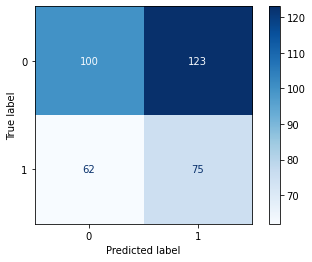

In [ ]:
plot_confusion_matrix(clf_lr_op, x_test, y_test, cmap='Blues', values_format='d')

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(x_train, y_train)
y_pred_knn = clf_knn.predict(x_test)

In [ ]:
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100,2)
print(f'Accuracy : {knn_accuracy}%')

Accuracy : 61.11%


In [ ]:
print(f'Cross val score: {np.mean(cross_val_score(clf_knn, x, y, cv=9, n_jobs=-1)).round(2)*100}%')

Cross val score: 59.0%


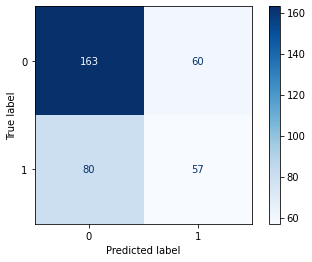

In [ ]:
plot_confusion_matrix(clf_knn, x_test, y_test, cmap='Blues', values_format='d')

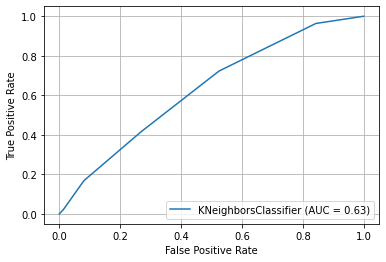

In [ ]:
plot_roc_curve(clf_knn, x_test, y_test)
plt.grid()

In [ ]:
knn_roc = round(roc_auc_score(y_test, y_pred_knn)*100,2)
print(f'Roc auc score : {knn_roc}%')

Roc auc score : 57.35%


### find optimal parameter

Best n_neighbors : 27


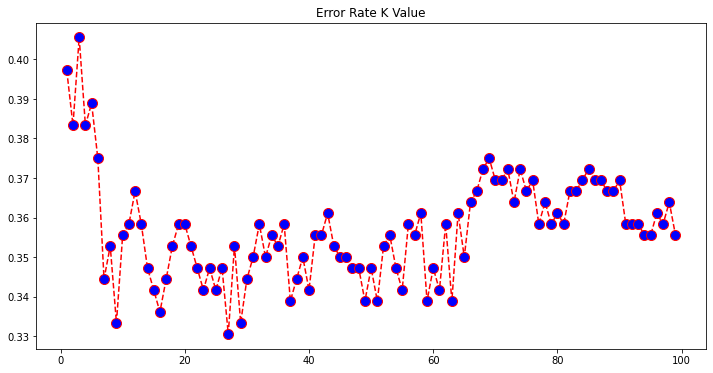

In [ ]:
error = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize =10)
plt.title('Error Rate K Value')
print(f'Best n_neighbors : {np.argmin(error)+1}')

### optimal parameter

In [ ]:
clf_knn_op = KNeighborsClassifier(n_neighbors=27)
clf_knn_op.fit(x_train, y_train)
y_pred_knn_op = clf_knn_op.predict(x_test)

In [ ]:
knn_accuracy = round(accuracy_score(y_test, y_pred_knn_op)*100,2)
print(f'Accuracy : {knn_accuracy}%')

Accuracy : 66.94%


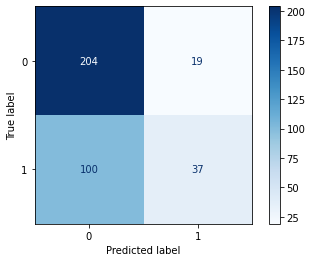

In [ ]:
plot_confusion_matrix(clf_knn_op, x_test, y_test, cmap='Blues', values_format='d')

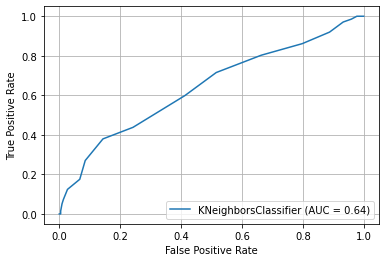

In [ ]:
plot_roc_curve(clf_knn_op, x_test, y_test)
plt.grid()

In [ ]:
print(classification_report(y_test, y_pred_knn_op))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       223
           1       0.66      0.27      0.38       137

    accuracy                           0.67       360
   macro avg       0.67      0.59      0.58       360
weighted avg       0.67      0.67      0.63       360



In [ ]:
knn_roc = round(roc_auc_score(y_test, y_pred_knn_op)*100,2)
print(f'Roc auc score : {knn_roc}%')

Roc auc score : 59.24%


## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=50)
clf_dt.fit(x_train, y_train)
y_pred_dt = clf_dt.predict(x_test)

In [ ]:
dt_accuracy = round(accuracy_score(y_test, y_pred_dt)*100,2)
print(f'Accuracy : {dt_accuracy}%')

Accuracy : 56.11%


In [ ]:
print(f'Cross val score: {np.mean(cross_val_score(clf_dt, x, y, cv=10, n_jobs=-1)).round(2)*100}%')

Cross val score: 56.99999999999999%


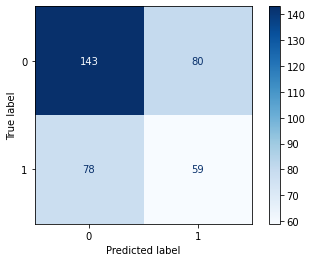

In [ ]:
plot_confusion_matrix(clf_dt, x_test, y_test, cmap='Blues', values_format='d')

In [ ]:
dt_roc = round(roc_auc_score(y_test, y_pred_dt)*100,2)
print(f'Roc auc score : {dt_roc}%')

Roc auc score : 53.6%


### find optimal parameter

In [ ]:
gs_dt = GridSearchCV(clf_dt,
                  param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1,20)},
                  scoring='roc_auc', return_train_score=True, n_jobs=-1)
gs_dt.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=50,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [ ]:
gs_dt.best_params_

{'criterion': 'entropy', 'max_depth': 5}

### optimal parameter

In [ ]:
clf_dt_op = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
clf_dt_op.fit(x_train, y_train)
y_pred_dt_op = clf_dt_op.predict(x_test)

In [ ]:
dt_accuracy = round(accuracy_score(y_test, y_pred_dt_op)*100,2)
print(f'Accuracy : {dt_accuracy}%')

Accuracy : 62.22%


In [ ]:
print(f'Cross val score: {np.mean(cross_val_score(clf_dt_op, x, y, cv=10, n_jobs=-1)).round(2)*100}%')

Cross val score: 62.0%


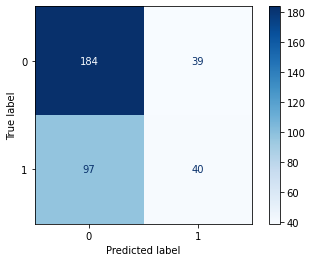

In [ ]:
plot_confusion_matrix(clf_dt_op, x_test, y_test, cmap='Blues', values_format='d')

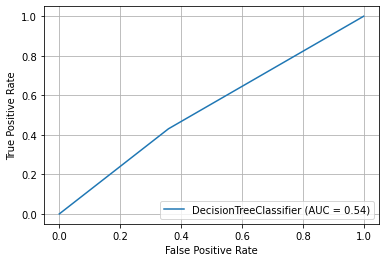

In [ ]:
plot_roc_curve(clf_dt, x_test, y_test)
plt.grid()

In [ ]:
print(classification_report(y_test, y_pred_dt_op))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       223
           1       0.51      0.29      0.37       137

    accuracy                           0.62       360
   macro avg       0.58      0.56      0.55       360
weighted avg       0.60      0.62      0.59       360



In [ ]:
dt_roc = round(roc_auc_score(y_test, y_pred_dt_op)*100,2)
print(f'Roc auc score : {dt_roc}%')

Roc auc score : 55.85%


## SVM

In [ ]:
from sklearn import svm

In [ ]:
clf_svm = svm.SVC(max_iter=10000, kernel='linear', C=0.1, class_weight='balanced')
clf_svm.fit(x_train, y_train)
y_pred_svm = clf_svm.predict(x_test)

In [ ]:
svm_accuracy = round(accuracy_score(y_test, y_pred_svm)*100,2)
print(f'Accuracy : {svm_accuracy}%')

Accuracy : 47.5%


In [ ]:
print(f'Cross val score: {np.mean(cross_val_score(clf_svm, x, y, cv=9, n_jobs=-1)).round(2)*100}%')

Cross val score: 50.0%


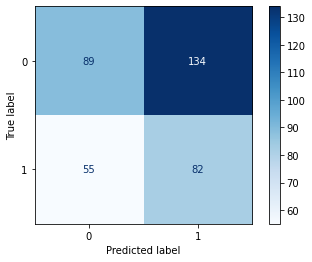

In [ ]:
plot_confusion_matrix(clf_svm, x_test, y_test, cmap='Blues', values_format='d')

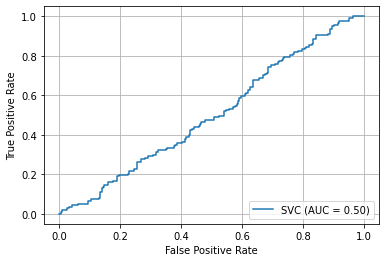

In [ ]:
plot_roc_curve(clf_svm, x_test, y_test)
plt.grid()

In [ ]:
svm_roc = round(roc_auc_score(y_test, y_pred_svm)*100,2)
print(f'Roc auc score : {svm_roc}%')

Roc auc score : 49.88%


### find optimal parameter

In [ ]:
gs_svm = GridSearchCV(clf_svm,
                  param_grid={'kernel': ['linear','rbf'],'C':np.arange(0.01,2,0.01)},
                  scoring='roc_auc', return_train_score=True, n_jobs=-1)
gs_svm.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=0.1, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=10000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.01, 0.02, 0.03, 0....
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99]),
                         'kernel': ['linear', 'rbf']},
             p

In [ ]:
gs_svm.best_params_

{'C': 1.84, 'kernel': 'rbf'}

### optimal parameter

In [ ]:
clf_svm_op = svm.SVC(max_iter=10000, kernel='rbf', C=1.84, class_weight='balanced')
clf_svm_op.fit(x_train, y_train)
y_pred_svm_op = clf_svm_op.predict(x_test)

In [ ]:
svm_accuracy = round(accuracy_score(y_test, y_pred_svm_op)*100,2)
print(f'Accuracy : {svm_accuracy}%')

Accuracy : 68.61%


In [ ]:
print(f'Cross val score: {np.mean(cross_val_score(clf_svm_op, x, y, cv=9, n_jobs=-1)).round(2)*100}%')

Cross val score: 61.0%


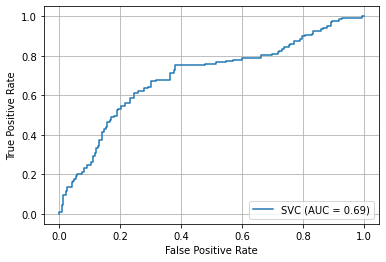

In [ ]:
plot_roc_curve(clf_svm_op, x_test, y_test)
plt.grid()

In [ ]:
print(classification_report(y_test, y_pred_svm_op))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       223
           1       0.58      0.64      0.61       137

    accuracy                           0.69       360
   macro avg       0.67      0.68      0.67       360
weighted avg       0.69      0.69      0.69       360



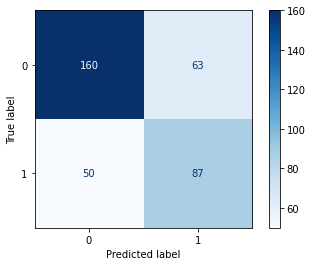

In [ ]:
plot_confusion_matrix(clf_svm_op, x_test, y_test, cmap='Blues', values_format='d')

In [ ]:
svm_roc = round(roc_auc_score(y_test, y_pred_svm_op)*100,2)
print(f'Roc auc score : {svm_roc}%')

Roc auc score : 67.63%


## Ensemble

In [ ]:
voting_df = pd.DataFrame({'dt': y_pred_dt_op, 'knn': y_pred_knn_op, 'svm': y_pred_svm_op})
voting_df

,dt,knn,svm
0,1,1,1
1,0,0,0
2,0,0,1
3,1,0,0
4,0,0,0
...,...,...,...
355,0,0,0
356,1,1,1
357,0,0,1
358,0,0,0


In [ ]:
voting_df = voting_df.sum(axis=1)


In [ ]:
voting_df = voting_df.apply(lambda x: 1 if x>=2 else 0)
voting_df

0      1
1      0
2      0
3      0
4      0
      ..
355    0
356    1
357    0
358    0
359    0
Length: 360, dtype: int64

In [ ]:
ensemble_accuracy = round(accuracy_score(y_test, voting_df)*100,2)
print(f'Accuracy : {ensemble_accuracy}%')

Accuracy : 67.5%


In [ ]:
ensemble_roc = round(roc_auc_score(y_test, voting_df)*100,2)
print(f'Roc auc score : {ensemble_roc}%')

Roc auc score : 62.08%


In [ ]:
print(classification_report(y_test, voting_df))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       223
           1       0.61      0.39      0.48       137

    accuracy                           0.68       360
   macro avg       0.65      0.62      0.62       360
weighted avg       0.66      0.68      0.66       360



## เลือกใช้โมเดล

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


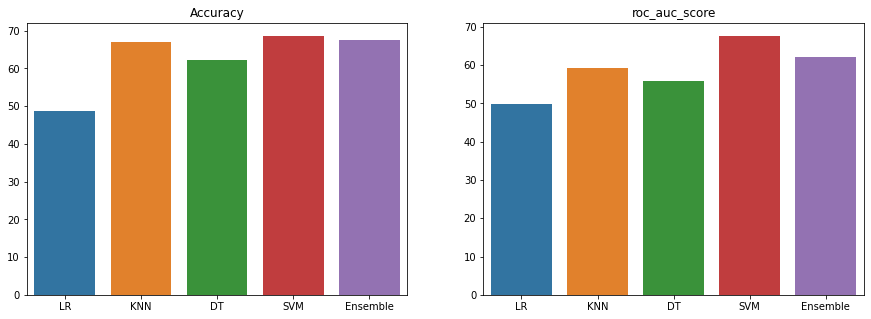

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(['LR', 'KNN', 'DT', 'SVM', 'Ensemble'],[lr_accuracy, knn_accuracy, dt_accuracy, svm_accuracy, ensemble_accuracy])
plt.title('Accuracy')

plt.subplot(1,2,2)
sns.barplot(['LR', 'KNN', 'DT', 'SVM', 'Ensemble'],[lr_roc, knn_roc, dt_roc, svm_roc, ensemble_roc])
plt.title('roc_auc_score')

plt.show()

**Model ที่เราจะเลือกใช้คือ**

*   SVM

